In [103]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
import plotly.express as px
df = pd.read_csv('D:/Coding/Python/src/Purwadika/Capstone 2/Airbnb Listings Bangkok.csv')



# Data Understanding

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Dataset Airbnb Bangkok memiliki 17 fitur yang terdiri tiap fitur memiliki tipe data int, float dan object (biasanya merupakan teks). Namun terdapat kolom anomali yaitu Unnamed: 0 kolom ini nantinya akan dihapus dari dataset. Dataset ini juga memiliki baris data sebanyak 15854 data sehingga ukuran dataset ini 15854 baris x 16 kolom.

kolom-kolom yang tersedia pada dataset ini adalah
- **id** : id unik Airbnb untuk listing (daftar penginapan).    
- **name** : nama dari listing
- **host_id** : id unik Airbnb untuk host/pemilik
- **host_name** : nama host, biasanya hanya nama depan
- **neighbourhood** : wilayah atau lingkungan tempat listing berada, ditentukan oleh latitude dan longtitude
- **latitude** : garis lintang
- **longitude** : garis bujur
- **room_type** : tipe tempat penginapan (rumah,kamar bersama,rumah/apartement)
- **price** : harga harian dalam mata uang lokal.
- **number_of_reviews** : jumlah ulasan yang dimiliki oleh listing tersebut
- **last_review** : tanggal dari ulasan terakhir atau terbaru
- **calculated_host_listings_count** :jumlah listing yang dimiliki host di kota atau wilayah tersebut dalam data saat ini.
- **availability_365** : : ketersediaan properti dalam 365 hari ke depan
- **reviews_per_month** : review bulanan dari tiap tempat 
- **number_of_reviews_ltm** : jumlah ulasan yang diterima oleh listing dalam 12 bulan terakhir.


In [105]:
df.head()


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [106]:
df.describe()


,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Berdasarkan statistik deskriptif dari kolom yang perlu diperhatikan ada di kolom price, terdapat harga listing yang bernilai 0. Penyewaan listing tidak mungkin 0, untuk itu akan dilakukan pengecekan pada data tersebut dan akan dilakukan pengahpusan atau tidka di analisis nanti.

In [107]:
df[df['price']==0]


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


Berdasarkan pengecekan data, hanya 1 listing yang memilki harga 0. Pada kolom data lainnya, minimum_night, number_reviwes,last_review, hingga kolom calculated_host_list tidak ada informasi tambahan hanya nilai nan dan 0. Selain itu host yang mempunyai listing ini hanya satu saja listing yang dimiliki. Mungkin saja listing ini sudah off atau belum terjamah oleh wisatawan. Oleh karena itu data ini akan di drop dan dianggap anaomali

# Data Cleanning


In [108]:
# copy dataset agar saat melakukan analisis data, isi data tidak berubah seluruhnya
df_1 = df.copy()


In [109]:
#drop kolom karena kolom tersebut tidak perlukan untuk dianalisis.
df_1 = df_1.drop(columns=['Unnamed: 0'])


In [110]:
df_1.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [111]:
df_1.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

Kolom Unamed : 0 di drop karena tidak berpengaruh dalam analisis.

## Transformasi Tipe Data Kolom


Berdasarkan pemahaman data sebelumnya, kolom last_review dapat diubah tipe datanya menjadi tipe data date time dan juga kolom price diubah tipe datanya menjadi numeric agar nanto bisa dilakukan operasi aritmatika

In [112]:
# Mengubah tipe data kolom last_review menjadi tahun-waktu untuk analisa lebih mendalam
df_1['last_review'] = pd.to_datetime(df_1['last_review'])

# Ekstrakasi tahun dari last_review untuk analisa lebih mendalam
df_1['review_year'] = df_1['last_review'].dt.year

# Mengubah tipe data kolom price menjadi numeric agar bisa melakukan perhitungan terkait harga penginapan
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')


In [113]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

## Cek Missing Value

In [114]:
# melihat jumlah missing value setiap kolom 
df_1.isna().sum()


id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
review_year                       5790
dtype: int64

In [115]:
#menghitung persentase missing value tiap kolom
df_1.isna().mean() * 100


id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
review_year                       36.520752
dtype: float64

C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\544370954.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




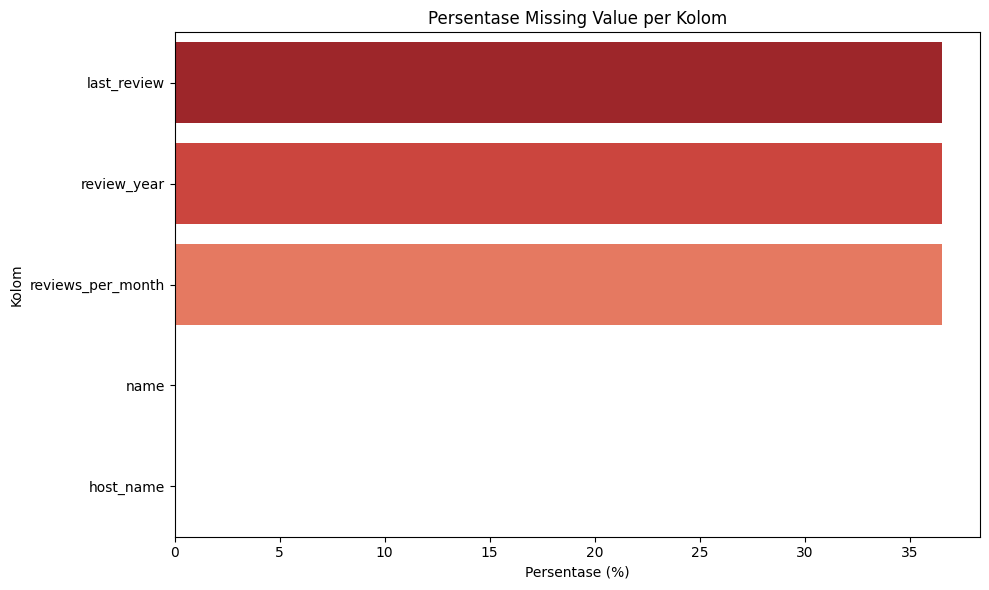

In [116]:
missing_percent = df_1.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='Reds_r')
plt.title('Persentase Missing Value per Kolom')
plt.xlabel('Persentase (%)')
plt.ylabel('Kolom')
plt.tight_layout()
plt.show()


Terlihat kolom last_review dan reviews_per_month memiliki persentase missing value sebesar 36.5 % Selain itu kolom name memiliki persentase missing value sebesar 5%. Kolom host_name juga memiliki persentase missing value sebesar 0.006%

- Missing value pada kolom **last_review** dan **reviews_per_month** dapat didrop atau tidak dilakukan drop.Kolom tersebut dapat dirop jika analisa tidak terlalu membutuhkan kolom tersebut,namun akan dicek terlebih dahulu apakah bisa langsung dihapus atau tidak.

- Missing value pada kolom **name** dapat didrop agar konsistensi data tetap terjaga sehingga informasi yang nanti disampaikan terkati nama listing tidak membingungkan.

- Missing value pada kolom **host_name** dapat didrop dikarenakan hanya terdapat 1 baris data saja yang memiliki missing value pada kolom tersebut. 

In [117]:
df_1 = df_1.dropna(subset=['name','host_name'])
df_1 = df_1[df_1['price']!=0]


In [118]:
df_1[df_1['price']==0]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year


In [119]:
df_1.isnull().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5783
reviews_per_month                 5783
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
review_year                       5783
dtype: int64

## Cek Data Duplikat

In [120]:
df_1.duplicated().sum()


np.int64(0)

Pengecekan duplikasi data di seluruh kolom, tidak ditemukan data duplikat. 
Namun hal ini belum tentu benar, perlu penggalian informasi lagi terkait data duplikat yang ada pada dataset.

In [121]:
# Mengecek apakah 1 host bisa memiliki lebih dari 1 listing
host_listing_count = df_1.groupby('host_id')['name'].nunique().reset_index()
host_listing_count = host_listing_count.rename(columns={'name': 'total_listings'})
host_listing_count = host_listing_count.sort_values(by='total_listings', ascending=False)
host_listing_count = host_listing_count.reset_index()
host_listing_count = host_listing_count.drop(columns=['index'])


In [122]:
host_listing_count.head()


,host_id,total_listings
0,26736483,89
1,68154488,55
2,201677068,51
3,312545246,49
4,62257044,48


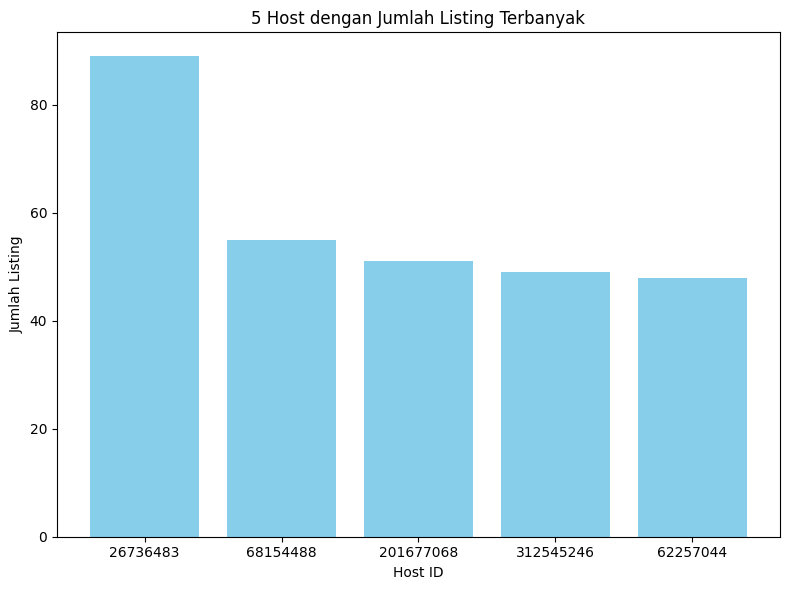

In [123]:
plt.figure(figsize=(8, 6))
plt.bar(host_listing_count.head()['host_id'].astype(str), host_listing_count.head()['total_listings'], color='skyblue')
plt.xlabel('Host ID')
plt.ylabel('Jumlah Listing')
plt.title('5 Host dengan Jumlah Listing Terbanyak')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Ditemukan bahwa 1 host dapat memiliki lebih dari 1 listing, artinya bisa jadi ada potensi data duplikat untuk 1 host yang memiliki banyak listing.

In [124]:
len(df_1[df_1.duplicated(subset=['name','host_name','host_id','neighbourhood'])])


873

Menggunakan kombinasi kolom **'name','host_name','host_id','neighbourhood'** ditemukan data duplikat sebanyak 873 baris data. Hal ini sesuai dengan pendugaan sebelumnya bahwa 1 host dapat memiliki lebih dari 1 listing. Namun pada permasalahan ini, data duplikasi tidak dihapus untuk memperkaya informasi data yang digunakan dianalisa mendalam.

# Analisis

Analisa yang akan dilakukan dengan data listing Airbnb Bangkok adalah 
 > **Analisis Harga Penginapan Airbnb berdasarkan kelompok Neighbourhood Bangkok: Perbandingan Harga dan Tipe Kamar, Lokasi listing dan Ketersediaan Listing**



**1. Pengelompokkan Data berdasarkan Neigbourhood**

Tahapan awal untuk menganalisis kelompok aktivitas listing berdasarkan neighbourhood, dihitung terlebih dahulu jumlah listing yang ada di setiap neigbourhood. Setelah itu dilanjutkan dengan analisa-analisa mendalama setiap kelompok aktivitas listing


In [125]:
# Kelompokkan berdasarkan 'neighbourhood' dan hitung jumlah listing per neighbourhood
listing_count = df_1.groupby('neighbourhood').size().reset_index(name='total_listings')
listing_count = listing_count.sort_values(by='total_listings', ascending=False).reset_index()
listing_count = listing_count.drop(columns=['index'])

len(listing_count)


50

In [126]:
listing_count.head()


,neighbourhood,total_listings
0,Vadhana,2150
1,Khlong Toei,2096
2,Huai Khwang,1125
3,Ratchathewi,1113
4,Bang Rak,827


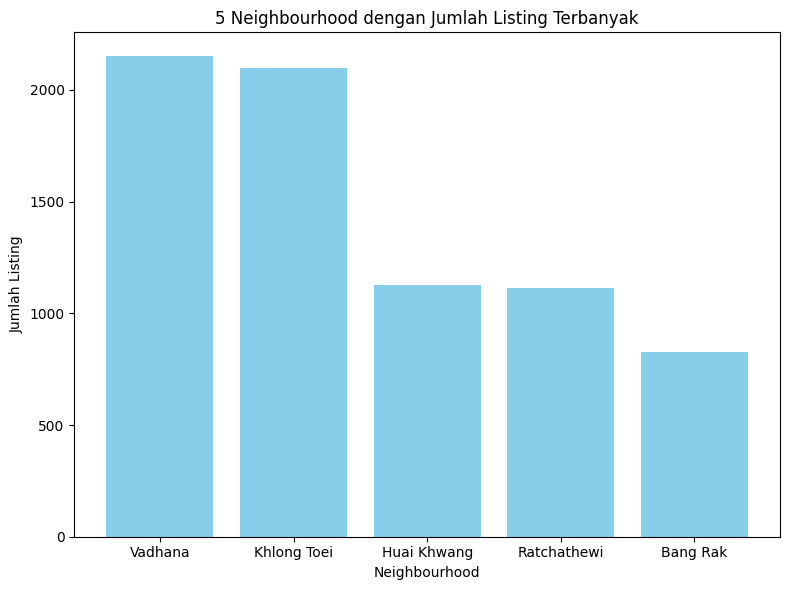

In [127]:
plt.figure(figsize=(8, 6))
plt.bar(listing_count.head()['neighbourhood'].astype(str), listing_count.head()['total_listings'], color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.title('5 Neighbourhood dengan Jumlah Listing Terbanyak')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\737127869.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




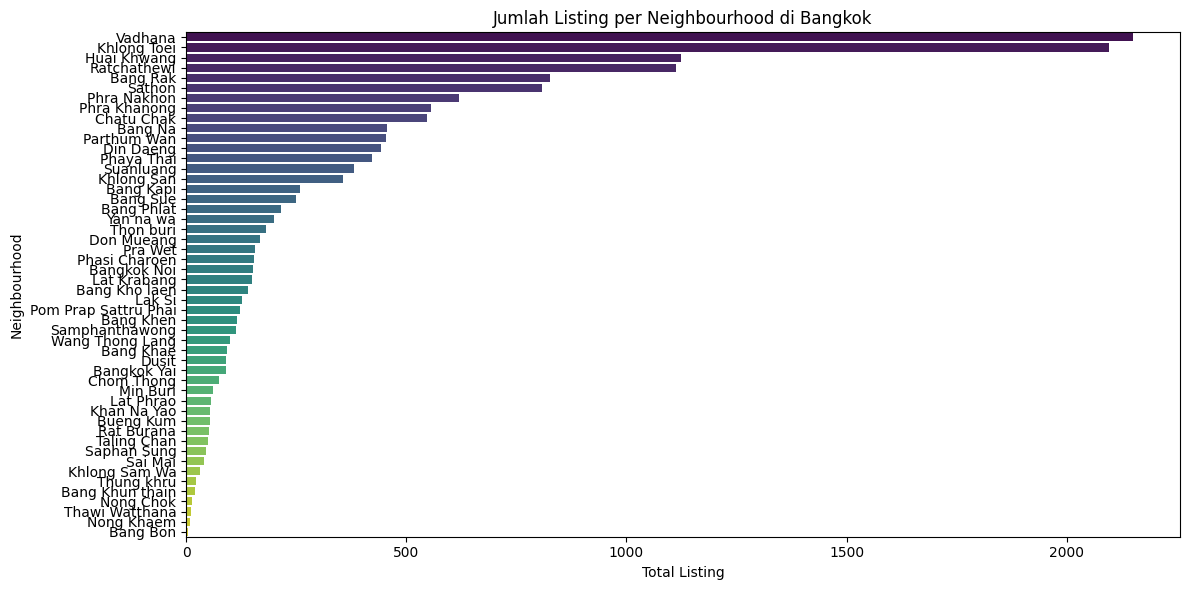

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(data=listing_count, x='total_listings', y='neighbourhood', palette='viridis')
plt.title('Jumlah Listing per Neighbourhood di Bangkok')
plt.xlabel('Total Listing')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()


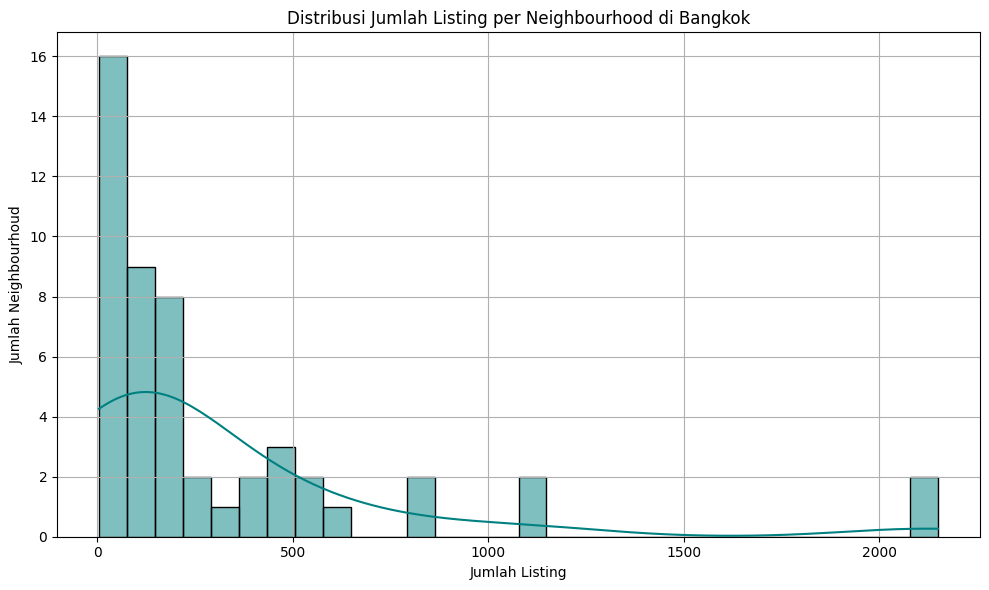

In [129]:
# Plot distribusi jumlah listing per neighbourhood
plt.figure(figsize=(10, 6))
sns.histplot(listing_count['total_listings'], bins=30, kde=True, color='teal')
plt.title('Distribusi Jumlah Listing per Neighbourhood di Bangkok')
plt.xlabel('Jumlah Listing')
plt.ylabel('Jumlah Neighbourhoud')
plt.grid(True)
plt.tight_layout()
plt.show()


Berdasarkan plot bar terlihat 5=Neighbourhood di Bangkok yang mempunyai total listing tertinggi, didapatkan daerah teramai listing yaitu di daerah vadhana dengan total listing yaitu 2151 listing dilanjut dengan 4 neighbourhood lainnya.

Berdasarkan histogram jumlah listing per Neigbourhood di Bangkok didapatkan kesimpulan
- Arah histogram **right-skewed** yang artinya sebagian besar neighbourhood di Bangkok memiliki jumlah listing yang relatif rendah.
- Jumlah listing yang sangat besar, memiliki jumlah neighbourhoud yang rendah.

Selanjutnya melakukan pengelompokkan daerah aktif listing. Pengelompokkan didasari oleh kuartil untuk membagi kelompok sesuai ukuran data dimana dibagi menjadi 3 kelompok, yaitu:

- Rendah
- Sedang 
- Tinggi

Pengelompokkan daerah aktif listing dibagi menjadi 3, berdasrakan persentase distribusi yaitu Q1, Q2, dan Q3.Selein itu untuk mempermudah intepretasi analisa lebih lanjut. 

In [130]:
# Tambahkan kolom kategori aktivitas berdasarkan kuartil
listing_count['activity_level'] = pd.qcut(
    listing_count['total_listings'],
    q=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)


In [131]:
range_listing = listing_count.groupby('activity_level')['total_listings'].agg(['min', 'max', 'count']).reset_index()

range_listing.columns = ['Kategori Aktivitas', 'Jumlah Listing Minimum', 'Jumlah Listing Maksimum', 'Jumlah Neighbourhood']

range_listing


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\836474457.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Kategori Aktivitas,Jumlah Listing Minimum,Jumlah Listing Maksimum,Jumlah Neighbourhood
0,Rendah,5,90,17
1,Sedang,91,216,16
2,Tinggi,250,2150,17


Distribusi pembagian kelas setiap kelas menggunakan nilai Q1, Q2, Q3 memberikan pengelompokkan neighbourhound secara merata. Yang artinya pengelompokkan ini sah dan adil untuk dilakukan.

In [132]:
# Urutkan berdasarkan aktivitas dan jumlah listing
listing_top3 = listing_count.sort_values(['activity_level', 'total_listings'], ascending=[True, False])

# Ambil 3 terbesar per kategori aktivitas
top3_class = listing_top3.groupby('activity_level').head(3).reset_index(drop=True)

top3_class


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\726417850.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,neighbourhood,total_listings,activity_level
0,Bangkok Yai,90,Rendah
1,Chom Thong,74,Rendah
2,Min Buri,62,Rendah
3,Bang Phlat,216,Sedang
4,Yan na wa,200,Sedang
5,Thon buri,182,Sedang
6,Vadhana,2150,Tinggi
7,Khlong Toei,2096,Tinggi
8,Huai Khwang,1125,Tinggi


In [133]:
# Urutkan berdasarkan aktivitas dan jumlah listing dari besar ke kecil
listing_sorted = listing_count.sort_values(['activity_level', 'total_listings'], ascending=[True, False])

# Ambil 3 teratas tiap kategori
top3_per_category = listing_sorted.groupby('activity_level').head(3).copy()

# Urutkan kembali dalam tiap kategori dari kecil ke besar
top3_per_category = top3_per_category.sort_values(['activity_level', 'total_listings'], ascending=[True, True])

# Tambahkan label ranking dalam kategori
top3_per_category['ranking'] = top3_per_category.groupby('activity_level')['total_listings'].rank(method='first', ascending=True).astype(int)


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\3598856059.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\3598856059.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



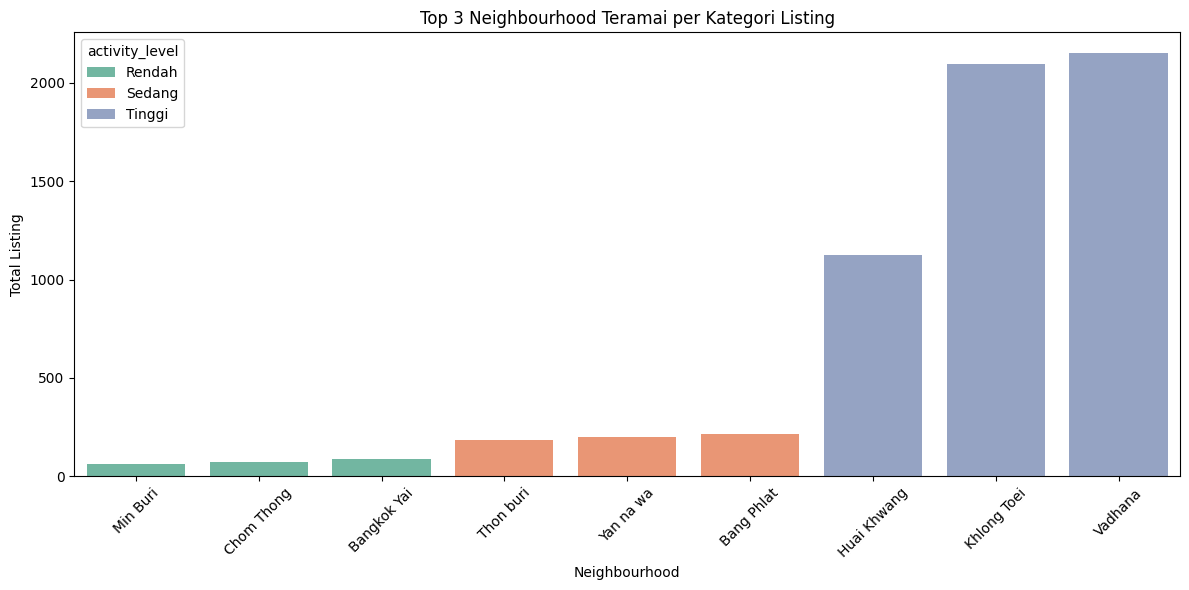

In [134]:
# Gabungkan activity_level dan ranking agar mudah dikontrol urutannya
top3_per_category['label'] = top3_per_category['activity_level'].astype(str) + ' - ' + top3_per_category['ranking'].astype(str)

# Tentukan urutan bar dari label
top3_per_category = top3_per_category.sort_values(['activity_level', 'ranking'])

# Plot barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top3_per_category,
    x='neighbourhood',
    y='total_listings',
    hue='activity_level',
    dodge=False,
    palette='Set2'
)

plt.title('Top 3 Neighbourhood Teramai per Kategori Listing')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Listing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Grafik diatas menunjukkan top 3 daerah neigbourhood disetiap kelompoknya, mulai dari aktivitas rendah, sedang hingga tinggi. Setiap kelompok ini nantinya akan dianalisis untuk melihat perbandingan harga dan tipe kamar. sehingga nantinya turis ataupun pengembang Airbnb dapat mengetahui perbedaan harga ditiap kelompok tersebut.

**2. Analisis Harga Penginapan Berdasarkan Tingkat Listing**
   
Sebelum menganalisis lebih lanjut untuk setiap segmen kelas, kolom harga akan dianalisis terlebih dahulu secara umum. Setalah itu akan terdapat penambahan kolom: activity_level

- **activity_level** : kelas aktivitas listing tiap data

In [135]:
import pandas as pd

# Hitung jumlah listing per neighbourhood
listing_counts = df_1['neighbourhood'].value_counts().reset_index()
listing_counts.columns = ['neighbourhood', 'listing_count']

# Gabungkan jumlah listing ke dataframe utama
df_1 = df_1.merge(listing_counts, on='neighbourhood', how='left')

# Kelompokkan neighbourhood berdasarkan jumlah listing (Rendah, Sedang, Tinggi)
df_1['activity_level'] = pd.qcut(df_1['listing_count'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Ubah kolom harga ke tipe numerik
df_1['price'] = pd.to_numeric(df_1['price'], errors='coerce')


In [136]:
# Hitung statistik harga per segmentasi
price_segment_stats = df_1.groupby('activity_level')['price'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

price_segment_stats


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\1439160164.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,activity_level,mean,median,min,max,count
0,Rendah,2663.614108,1200.0,278,710760,5543
1,Sedang,2930.561189,1357.0,280,1000000,6055
2,Tinggi,4354.553462,1800.0,332,1100000,4246


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\3265719267.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




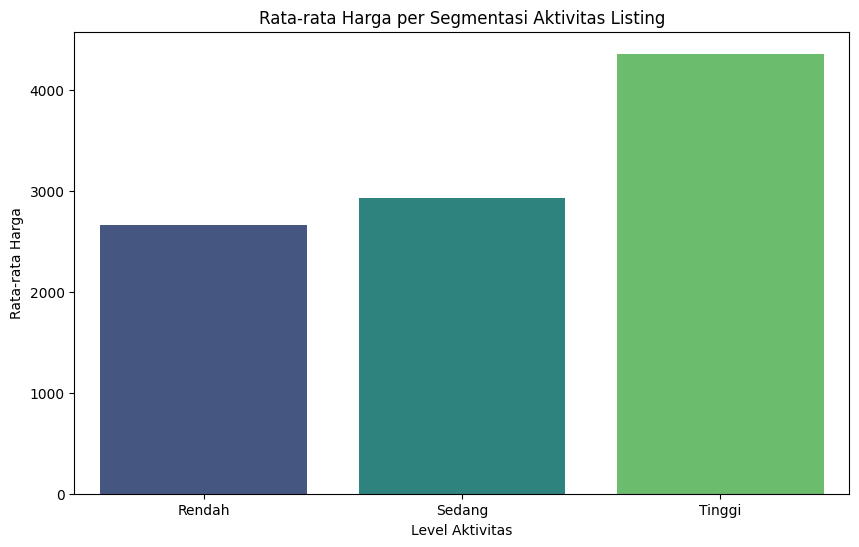

In [137]:
# Visualisasi rata-rata harga per segmentasi aktivitas
plt.figure(figsize=(10, 6))
sns.barplot(x='activity_level', y='mean', data=price_segment_stats, palette='viridis')
plt.title('Rata-rata Harga per Segmentasi Aktivitas Listing')
plt.ylabel('Rata-rata Harga')
plt.xlabel('Level Aktivitas')
plt.show()


Berdasarkan grafik di atas, kelompok listing tertinggi memiliki rata-rata harga sebesar 4353 BHT. Namun jika melihat total listing yang ada pada kelompok tinggi, banyaknya listing yang ada sangatlah sedikit dibandingkan dengan 2 kelompok lainnya yaitu kelompok Rendah dan Sedang.

Untuk memperjelas konteks harga pada masing-masing kelompok, dilakukan perbandingan tipe kamar/bagungan yang menjadi faktor mengapa harga bisa berbeda di tiap kelas aktivitas listing.

In [138]:
room_price_stats = df_1.groupby(['activity_level', 'room_type'])['price'].agg(['sum','mean', 'median','max','min','count']).reset_index() 
room_price_stats = room_price_stats.sort_values(['activity_level', 'mean'], ascending=[True, False]).reset_index()
room_price_stats['percentage'] = room_price_stats['sum'] / room_price_stats.groupby('activity_level')['sum'].transform('sum')
room_price_stats = room_price_stats.drop(columns='index')
print("Statistik Harga per Tipe Kamar dan Aktivitas Listing:") 

room_price_stats


Statistik Harga per Tipe Kamar dan Aktivitas Listing:


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\2530749.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\2530749.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,activity_level,room_type,sum,mean,median,max,min,count,percentage
0,Rendah,Private room,7004653,2778.521618,1020.0,600700,278,2521,0.474428
1,Rendah,Entire home/apt,7120050,2678.724605,1309.5,710760,346,2658,0.482244
2,Rendah,Hotel room,444767,2257.700508,1357.0,15442,330,197,0.030124
3,Rendah,Shared room,194943,1167.323353,489.0,31200,280,167,0.013204
4,Sedang,Hotel room,913611,3334.346715,1708.0,300000,318,274,0.051487
5,Sedang,Entire home/apt,10920834,3327.493601,1466.0,1000000,337,3282,0.615447
6,Sedang,Private room,5679458,2568.728177,1286.0,300000,315,2211,0.320068
7,Sedang,Shared room,230645,800.850694,500.0,20895,280,288,0.012998
8,Tinggi,Private room,4985993,4840.769903,1675.0,372227,350,1030,0.269667
9,Tinggi,Entire home/apt,12841001,4322.114103,1870.0,1100000,332,2971,0.694505


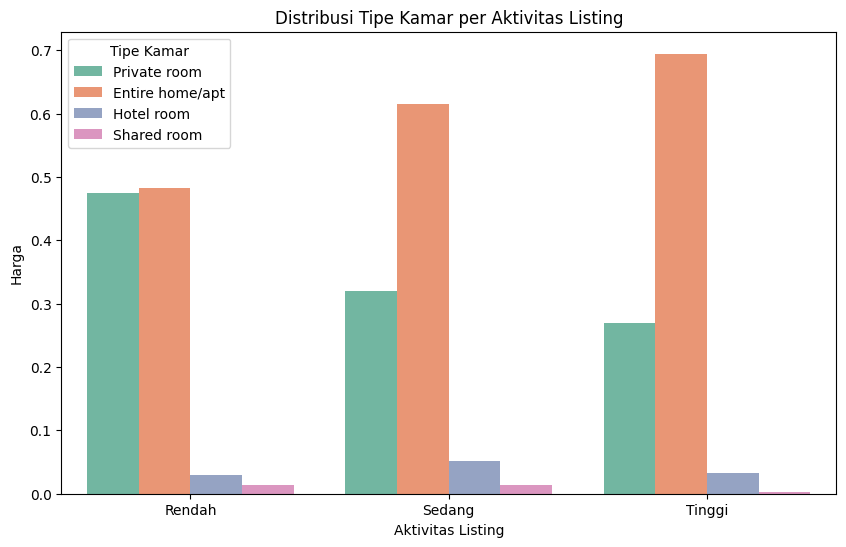

In [139]:
plt.figure(figsize=(10,6)) 
sns.barplot(data=room_price_stats, x='activity_level',y='percentage', hue='room_type',errorbar=None,palette='Set2') 
plt.title('Distribusi Tipe Kamar per Aktivitas Listing') 
plt.xlabel('Aktivitas Listing') 
plt.ylabel('Harga') 
plt.legend(title='Tipe Kamar') 
plt.show()


Berdasarkan tabel deskripsi dan grafik di atas, tipe kamar yang menjadi faktor tingginya harga di kelompok aktivitas tinggi yaitu Entire home/apt. Dengan persentase sebesar 69 % dengan rata - rata harga 4322 THB dikelasnya sebagai faktor tingginya harga dikelas tersebut. Namun untuk tipe shared room, mendapatkan persentase yang sangat kecil sebesar 0.2% hal ini jelas jauh sekali nilainya persentasenya dibandingkan Entire home/apt

Untuk kelompok aktivitas sedang tipe Entire home/apt juga menjadi tipe room yang memiliki proporsi harga tertinggi sebesar 61 % dengan rata - rata harga 3327 THB.

Untuk kelompok rendah persentase harga dengan tipe kamar private room dan Entire home/apt memiliki harga yang nyaris mirip dengan masing-masing persentase dan harganya nya 47 %, 2778 THB dan 48 %, 2678 THB.

Berdasarkan informasi ini, didapatkan insight"
 > Tipe kamar Entire Home/apt menjadi tipe kamar termahal untuk setiap kelompok aktivitas listing. Baik daerah listing itu sepi atau tidak, harga tipe kamar Entire home/apt menjadi tipe termahal

**3. Analisa Ketersedian Listing Berdasarkan Tingkat Listing**

Analisis ini bertujuan untuk melihat persebaran ketersedian listing di setiap kelompok aktivitas listing.

C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\2103965888.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




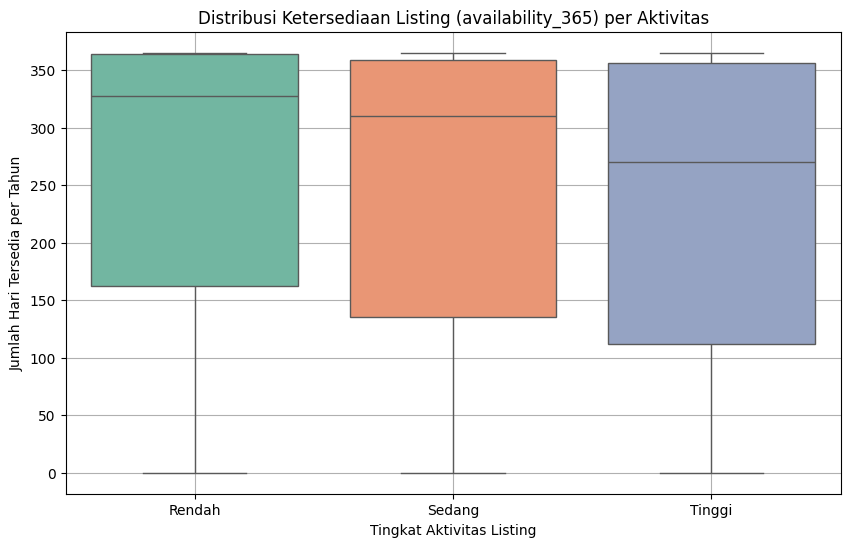

In [140]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='activity_level', y='availability_365', data=df_1, palette='Set2') 
plt.title('Distribusi Ketersediaan Listing (availability_365) per Aktivitas') 
plt.ylabel('Jumlah Hari Tersedia per Tahun') 
plt.xlabel('Tingkat Aktivitas Listing') 
plt.grid(True) 
plt.show()


In [141]:
df_1.groupby('activity_level')['availability_365'].describe()


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\1043063920.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,count,mean,std,min,25%,50%,75%,max
activity_level,,,,,,,,
Rendah,5543.0,255.971856,122.549024,0.0,162.0,327.0,364.0,365.0
Sedang,6055.0,244.050702,127.300450,0.0,135.0,310.0,359.0,365.0
Tinggi,4246.0,229.547810,126.436427,0.0,112.0,270.0,356.0,365.0


Berdasarkan boxplot di atas, persebaran jumlah hari di q1 untuk setiap kelompok aktivitas listing berbeda jauhh dimana ini mengindikasikan bahwa jumlah hari tersedia setiap kelompok berbeda. Kelompok listing Tinggi memiliki sebaran yang lebih luas yang dapat diartikan bahwa listing yang ada di kelompok ini, selalu dipesan oleh wisatawan atau di nonaktifkan oleh host.

Selain itu, kelompok listing aktivitas rendah terlihat memiliki sebaran yang tidak seluas 2 kelompok lainnya, yang meindikasikan bahwa kelompok listing ini selalu tersedia listingnya sepanjang tahun

In [142]:
df_1 = df_1.dropna(subset=['availability_365'])
df_1['availability_category'] = pd.qcut( df_1['availability_365'], q=3, labels=[ 'Rendah', 'Sedang', 'Tinggi'] )


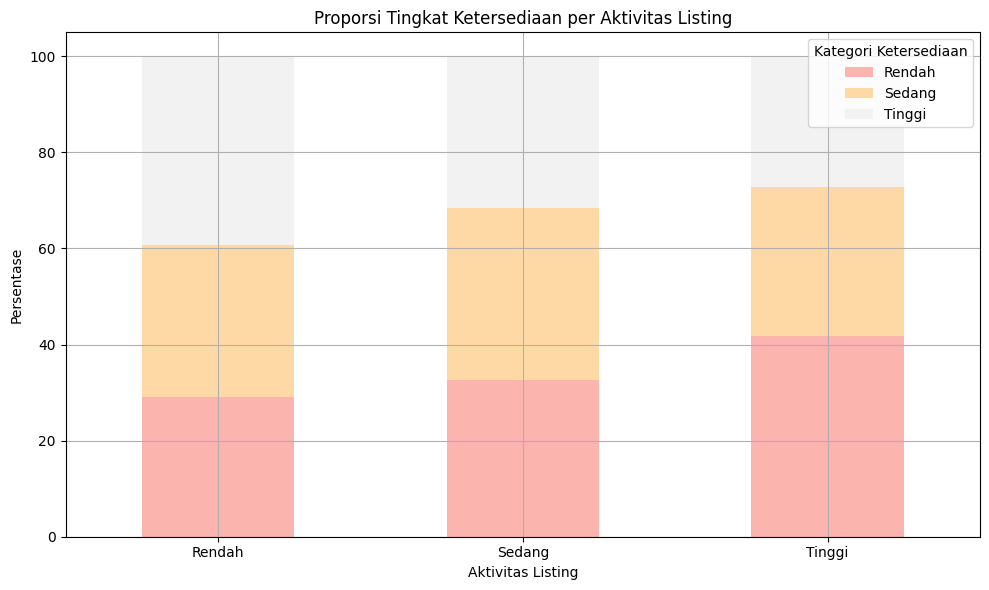

In [143]:
availability_dist = pd.crosstab(df_1['activity_level'], df_1['availability_category'], normalize='index') * 100 
availability_dist.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(10, 6)) 
plt.xticks(rotation=0)
plt.title('Proporsi Tingkat Ketersediaan per Aktivitas Listing') 
plt.ylabel('Persentase') 
plt.xlabel('Aktivitas Listing') 
plt.legend(title='Kategori Ketersediaan')
plt.grid(True) 
plt.tight_layout()
plt.show()


In [144]:
availability_prop = ( df_1.groupby('activity_level')['availability_category'] .value_counts(normalize=True) .rename('proportion') .reset_index() )
availability_prop['proportion_percent'] = (availability_prop['proportion'] * 100).round(2)
availability_prop


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\3420960209.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,activity_level,availability_category,proportion,proportion_percent
0,Rendah,Tinggi,0.392026,39.20
1,Rendah,Sedang,0.317518,31.75
2,Rendah,Rendah,0.290456,29.05
3,Sedang,Sedang,0.358547,35.85
4,Sedang,Rendah,0.325846,32.58
5,Sedang,Tinggi,0.315607,31.56
6,Tinggi,Rendah,0.417569,41.76
7,Tinggi,Sedang,0.309703,30.97
8,Tinggi,Tinggi,0.272727,27.27


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\2267646200.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



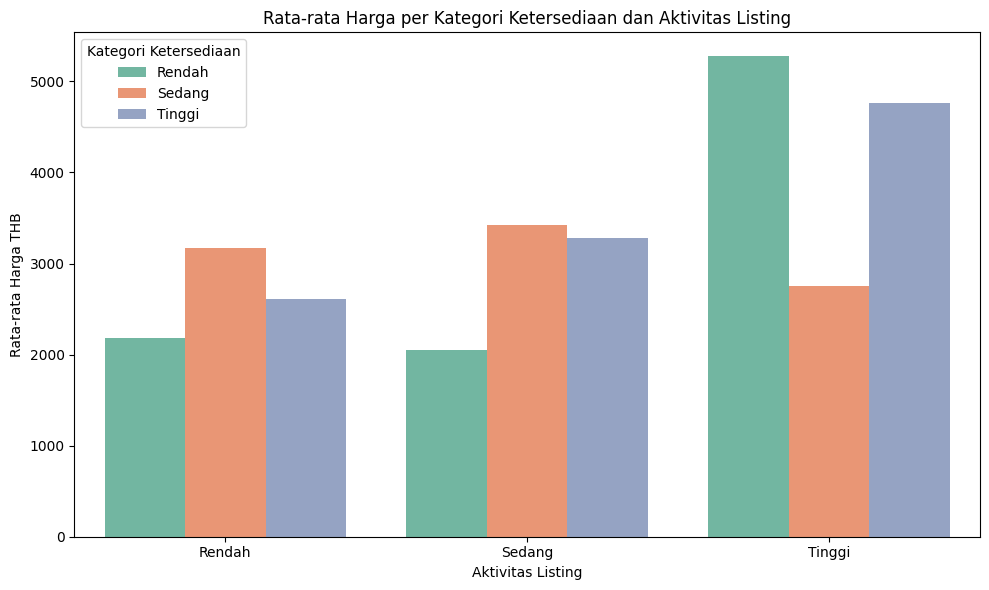

In [145]:
# Hitung rata-rata harga per kategori availability dan activity level
price_availability = df_1.groupby(['activity_level', 'availability_category'])['price'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(data=price_availability, x='activity_level', y='price', hue='availability_category',palette='Set2')
plt.title('Rata-rata Harga per Kategori Ketersediaan dan Aktivitas Listing')
plt.ylabel('Rata-rata Harga THB')
plt.xlabel('Aktivitas Listing')
plt.legend(title='Kategori Ketersediaan')
plt.tight_layout()
plt.show()


In [146]:
price_availability 


,activity_level,availability_category,price
0,Rendah,Rendah,2180.465839
1,Rendah,Sedang,3175.292614
2,Rendah,Tinggi,2607.155085
3,Sedang,Rendah,2046.487076
4,Sedang,Sedang,3423.500230
5,Sedang,Tinggi,3283.312402
6,Tinggi,Rendah,5275.168641
7,Tinggi,Sedang,2755.047909
8,Tinggi,Tinggi,4761.374784


Berdasarlam grafik dan tabel proporsi untuk setiap kategori di tiap kelas aktivitas listing, didapatkan proporsi dari kelas listing tertinggi yaitu kategori ketersedian rendah. Hal ini disebabkan tingginya harga penginapan untuk kategori ketersedian rendah dengan harga 5272 THB. Besarnya proporsi untuk kategori aktivitas tinggi dengan ketersediaan rendah sebesar 41 %.

Pada kelas aktivitas sedang, ketersedian ruangan selama setahun penuh mayoritas ketersediannya sedang. Artinya listing yang ada dikelompok tersebut seimbang antara yang memesan dan tidak dipesan. Melihat dari rata-rata harga untuk setiap kategori ketersedian, ketersedian sedang berada di harga 3423 THB sebagai harga ketersedian tertinggi. Besarnya proporsi untuk kategori aktivitas sedang dengan ketersediaan ruangan sedang sebesar 39 %.

Pada kelas aktivitas rendah, ketersedian ruangan selama setahun penuh mayoritas ketersediaanya tinggi. Artinya listing yang ada di kelompok tersebut
selalu tersedia ruangannya sepanjanga tahun. Melihat dari rata-rata harga untuk setiap kategori ketersedian, ketersedian sedang berada di harga 3175 THB sebaga harga ketersedian tertinggi. Besarnya proporsi untuk kategori aktivitas sedang dengan ketersedian ruangan tinggi yaitu 32 %

**4. Visualisai Lokasi Geografis Berdasarkan Kelompok Aktivitas Listing**

In [147]:
#mengambil data latitude dan longtitude
df_loc = df_1.copy()

#hapus baris kosong di kolom yang digunakan
df_loc = df_loc.dropna(subset=['latitude', 'longitude', 'price'])
fig = px.scatter_mapbox(df_loc, lat='latitude', lon='longitude', color='activity_level', # kolom kategori kelompok listing 
                        hover_name='neighbourhood', 
                        hover_data=['price', 'room_type', 'reviews_per_month'], 
                        zoom=10, height=700, 
                        mapbox_style='carto-positron', 
                        title='Sebaran Listing Airbnb Bangkok Berdasarkan Kelompok Aktivitas' ) 
fig.show()


C:\Users\PF3DG\AppData\Local\Temp\ipykernel_40244\614786166.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Berdasarkan grafik geografis di atas, sebaran listing membentuk daerahnya sendiri. Terlihat darah berwana hijau merupakan titik tengah dari kumpulan kelompok lainnya.Titik ini merupakan **kelompok listing tinggi**, ha ini dapat menandakan bahwa pusat keramaian berada di daerah listing tersebut. Melebar ke samping, kumpulan warnanya adalah biru yang menandakan daerah **kelompok listing sedang** dan terakhir **kelompok listing rendah** berada di daerah terluar yang menandakan daerah tersebut kurang diminati untuk penggunaan listingnya walaupun tersebar di berbagai daerah di kelompok tersebut.

# Kesimpulan

Berdasarkan analisis yang telah dilakukan dan mendapatkan insight setiap analisinya, didapatkan kesimpulan

1. Sebagian besar neigbourhood memiliki jumlah listing yang kecil dikarenakan persebaran distribusinya lebih banyak dibawah 500 listing.
2. Pengelompokkan kategori listing berdasarkan jumlah listingnya disetiap neighbourhood dapat memudahkan intepretasi aktif tidaknya listing di kelompok tersebut.
3. Tipe kamar termahal yang didapatkan dari setiap kelas aktivitas list yaitu Entire Home/apt
4. Neighbourhood yang ramai melakukan listing diatas 1000 listing, terdapat di pusat persebaran listing yaitu Vadhana dan Khlong Thei. Hal ini dikarenakan 2 daerah tersebut ramai dikunjungi pengujung/wisatawaan sehingga banyak hot membuka listing di daerah tersebut.
5. Tipe kamar/ruangan yang tersedia di ketiga kelas aktivitas listing, didominasi oleh tipe Entire home/apt.
6. Ketersedian ruangan dapat dipengaruhi oleh harga listing dan juga tipe kamar yang dipesan oleh wisatawan

# Rekomendasi

Rekomendasi yang dapat dikerahkan berdasarkan analisis dan insight yang didapatkan adalah:

1. Optimasi Strategi Harga Berdasarkan Tingkat Aktivitas Daerah
  
   >Host yang memiliki listing di daerah kelompok aktivitas listing rendah, dapat melakukan penyesuaian harga yang kompetitif atau menonjolkan kelebihan listing mereka.

2. Pengembangan Listing di Daerah Aktivitas Rendah
 
   > Pihak Airbnb ataupun pihak terkait lainnya dapat melakukan promosi ataupun iklan di daerah dengan tingkat aktivitas rendah, guna menarik wisatawan untuk menginap di daerah tersebut
3. Penyesuaian Tipe Kamar Berdasarkan Preferensi Pasar
   
   >Di wilayah dengan aktivitas tinggi dan sedang, host dapat mempertimbangkan menambah listing tipe “Private room” atau “Hotel room” untuk mengakomodasi pelancong hemat atau jangka pendek, apalagi jika berada di lokasi strategis.

4. Penyesuaian Ketersediaan (Availability) untuk Meningkatkan Performa
   
   > Host di daerah aktivitas tinggi dapat meningkatkan ketersediaan kalender agar peluang pemesanan lebih besar. Airbnb dapat memberikan notifikasi kepada host untuk membuka slot tanggal lebih luas.



